# **PART 3. HANDS-ON DATA VISUALIZATION AND ANALYSIS**

Remember the social decision-making experiment you completed a couple of weeks ago?

The image below might refresh your memory:

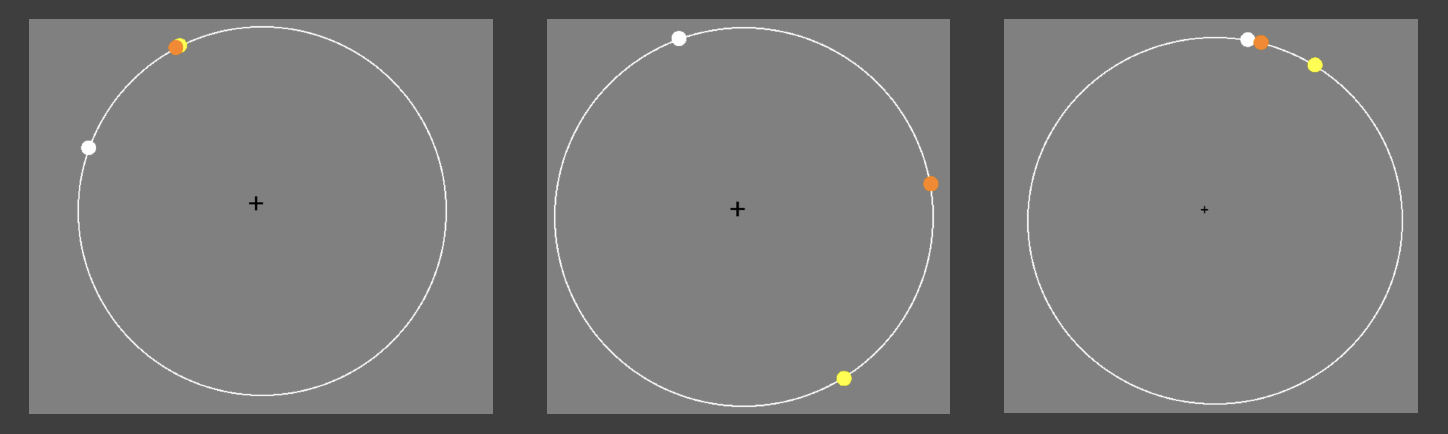


We will now try to analyse the same data in Python, let's start!

## **3.1 Analysis of categorical independent variables: ANOVA**




### **3.1.1 Data handlng with Pandas**

In [1]:
import numpy as np 
import pandas as pd
import warnings; warnings.simplefilter('ignore')
# Load the data
socialDecisionMakingData_ANOVA = pd.read_excel('data/data_BN_task1.xlsx', sheet_name = 'ANOVA')

# Before you start any analysis, explore the ANOVA dataset 
print(socialDecisionMakingData_ANOVA.shape)

# You can have a look at the first five rows using .head()
socialDecisionMakingData_ANOVA.head()

(195, 2)


,rating_score,influence_level
0,0.500000,low
1,0.516667,low
2,0.541667,low
3,0.508333,low
4,0.450000,low


In [42]:
# You can look at more (or less) than five rows as well!
socialDecisionMakingData_ANOVA.head(10)

,rating_score,influence_level
0,0.500000,low
1,0.516667,low
2,0.541667,low
3,0.508333,low
4,0.450000,low
5,0.500000,low
6,0.508333,low
7,0.500000,low
8,0.608333,low
9,0.500000,low


In [43]:
# Just as you can look at the first five rows, you can look at 
# the last five using .tail()
socialDecisionMakingData_ANOVA.tail()

,rating_score,influence_level
190,0.706695,high
191,0.521275,high
192,0.557143,high
193,0.564286,high
194,0.557143,high


In [44]:
# You can display all columns and their data types with .info():
socialDecisionMakingData_ANOVA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rating_score     195 non-null    float64
 1   influence_level  195 non-null    object 
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


#### **TASK 6**:

1. Try to find a method that will tell you how many responses there are in the 'low', 'medium' and 'high' condition. (**Question**: How do we access a column in pandas data frame?). Hint: you can use the function .value_counts() for this)

2. Try to calculate a grand mean rating score. Hint: Remember what you've learned in Part 2!


In [45]:
# Type your code below:

# Solution (Task 1):
print(socialDecisionMakingData_ANOVA['influence_level'].value_counts())

# Solution (Task 2):
grand_mean = np. mean(socialDecisionMakingData_ANOVA['rating_score']) # Overall mean rating score
print(grand_mean)

medium    65
high      65
low       65
Name: influence_level, dtype: int64
0.5293119276379907


### **3.1.2 Hands-on Data Visualisation with Matplotlib and Seaborn**

**Visualizing distribution of data**

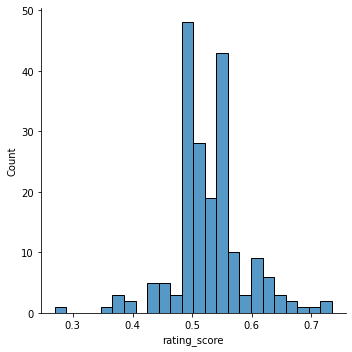

In [46]:
import seaborn as sns
# We will be relying on seaborn library in this set of tasks

# Histogram
sns.displot(socialDecisionMakingData_ANOVA, x = "rating_score")

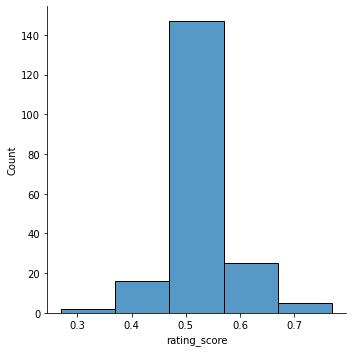

In [47]:
# We can choose the size of histogram bins
# Compare the two plots below

# Plot 1
sns.displot(socialDecisionMakingData_ANOVA, x = "rating_score", binwidth = 0.1)

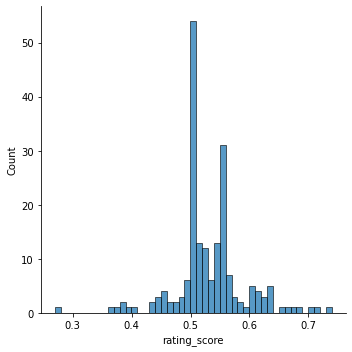

In [48]:
# Plot 2
sns.displot(socialDecisionMakingData_ANOVA, x = "rating_score", binwidth = 0.01)

Now we can ask the question how this distribution might differ across different levels of the variable 'influence_level'.

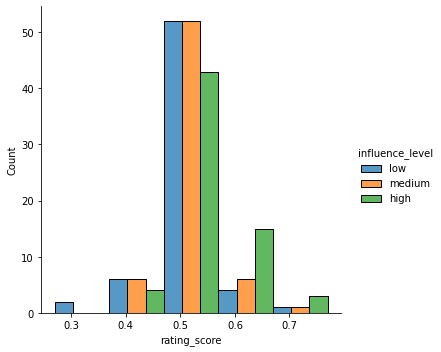

In [49]:
# We will plot a separate histogram for each of the unique values of 'influence_level'
# Feel free to adjust the binwidth so that you can easily read the plot
sns.displot(socialDecisionMakingData_ANOVA, x = "rating_score", hue = 'influence_level', multiple = 'dodge',binwidth=0.1) 

**Visualizing data when you have categorical variables**

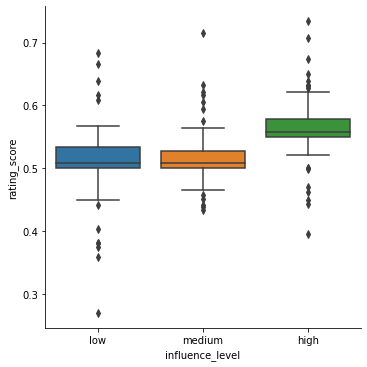

In [50]:
# Let's take a closer look at our data
# We can specify the type of plot we want by using the argument 'kind'
sns.catplot(x="influence_level", y="rating_score",
            kind="box", data=socialDecisionMakingData_ANOVA) # This is a so-called box plot 

#### **TASK 7**:

1. Now try to make a so-called **violin plot** using the same variables we used above (influence_level, rating_score).

In [51]:
# Type your code below:

# What do the box plot and the violin plot show us?

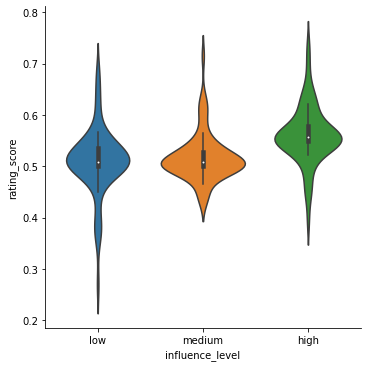

In [52]:
# Solution (Task 1):
sns.catplot(x="influence_level", y="rating_score",
            kind="violin", data=socialDecisionMakingData_ANOVA)

### **3.1.3 Data preprocessing with Pandas: Removing Outliers**

**Removing outliers**

Based on the box plot and the violin plot, there seem to be some data points that significantly differ from other observations.

Let's identify and remove so-called **outliers**.

In [53]:
# Clean outliers - To do
# first we want to bring the data into a format where each row corresponds to a single subject.
# We want separate columns for each influence level
# 1. make a copy of the data
df = socialDecisionMakingData_ANOVA
# 2. add subject ids. the three levels are currently stacked, so we need to repeat the sub id for each level
df['subject'] = np.tile(np.arange(1,66),3)
df.head()


,rating_score,influence_level,subject
0,0.500000,low,1
1,0.516667,low,2
2,0.541667,low,3
3,0.508333,low,4
4,0.450000,low,5


In [54]:
# 3. now we can transform the data such that there's a single row per subject (from long format to wide format)
df = df.pivot(index='subject',columns='influence_level',values='rating_score')
df.head()

influence_level,high,low,medium
subject,,,
1,0.633333,0.500000,0.540000
2,0.550000,0.516667,0.508333
3,0.610000,0.541667,0.541667
4,0.557143,0.508333,0.500000
5,0.450000,0.450000,0.500000


In [55]:
# 4. data transformation
# remember: we define any score above or below 2std as outlier. Let's zscore each column
from scipy.stats import zscore 
df['zs_high'] = zscore(df['high'])
df['zs_medium'] = zscore(df['medium'])
df['zs_low'] = zscore(df['low'])
df.head(15)

influence_level,high,low,medium,zs_high,zs_medium,zs_low
subject,,,,,,
1,0.633333,0.500000,0.540000,1.304501,0.491796,-0.150500
2,0.550000,0.516667,0.508333,-0.197833,-0.194450,0.109270
3,0.610000,0.541667,0.541667,0.883848,0.527914,0.498925
4,0.557143,0.508333,0.500000,-0.069061,-0.375041,-0.020615
5,0.450000,0.450000,0.500000,-2.000634,-0.375041,-0.929810
6,0.442857,0.500000,0.433333,-2.129405,-1.819770,-0.150500
7,0.542857,0.508333,0.491667,-0.326604,-0.555632,-0.020615
8,0.564286,0.500000,0.516667,0.059710,-0.013859,-0.150500
9,0.600000,0.608333,0.633333,0.703568,2.514417,1.538006


In [56]:
# 5. remove outliers, i.e. subjects where any value is outside of the range we accept:
outlier_mask = np.any(np.abs(df)>2,axis=1)
df_clean = df[outlier_mask==False]
df_clean.head(20)

influence_level,high,low,medium,zs_high,zs_medium,zs_low
subject,,,,,,
1,0.633333,0.500000,0.540000,1.304501,0.491796,-0.150500
2,0.550000,0.516667,0.508333,-0.197833,-0.194450,0.109270
3,0.610000,0.541667,0.541667,0.883848,0.527914,0.498925
4,0.557143,0.508333,0.500000,-0.069061,-0.375041,-0.020615
7,0.542857,0.508333,0.491667,-0.326604,-0.555632,-0.020615
8,0.564286,0.500000,0.516667,0.059710,-0.013859,-0.150500
10,0.550000,0.500000,0.500000,-0.197833,-0.375041,-0.150500
11,0.542857,0.516667,0.500000,-0.326604,-0.375041,0.109270
12,0.550000,0.508333,0.500000,-0.197833,-0.375041,-0.020615


### **3.1.4 ANOVA with Statsmodels, Scipy.stats and Pingouin**

**Check assumptions**

The analysis we want to do is **repeated-measures ANOVA**. Do you remember the assumptions for this analysis?

In [57]:
# Check assumptions 
# normality: shapiro-wilk
from scipy.stats import shapiro
levels = ['low','medium','high']
for lvl in levels:
    s,p = shapiro(df_clean[lvl])
    print(' test for normality,', lvl ,': W=', str(np.round(s,2)), ', p=', str(np.round(p,4)))

# sphericity
from pingouin import sphericity
spher,W,chi2,dof,p = sphericity(df_clean[['low','medium','high']])
print('\n test for sphericity: is_spherical: ', spher, ' p=', np.round(p,4))

 test for normality, low : W= 0.82 , p= 0.0
 test for normality, medium : W= 0.88 , p= 0.0002
 test for normality, high : W= 0.89 , p= 0.0002

 test for sphericity: is_spherical:  True  p= 1.0


**Repeated-measures ANOVA**

Having visualized the data, removed outliers and checked assumptions, we can now do the main analysis!
Note: Obviously, we should not do this, as the data isn't normally distributed. ANOVA is quite robust to this violation, but ideally, we would first need to transform the data, or even better, we could use a non-parametric test which doesn't rely on normally distributed data.

In [58]:
# let's only keep the first three columns and reshape from wide to long data (https://anvil.works/blog/tidy-data)
subject_ids = np.asarray(df_clean.index)
df_clean_long = df_clean[df_clean.columns[:3]].melt(value_name='rating_score')
df_clean_long['subject'] = np.tile(subject_ids,3)
df_clean_long

,influence_level,rating_score,subject
0,high,0.633333,1
1,high,0.550000,2
2,high,0.610000,3
3,high,0.557143,4
4,high,0.542857,7
...,...,...,...
142,medium,0.500000,60
143,medium,0.545032,62
144,medium,0.500000,63
145,medium,0.508333,64


In [61]:
# Repeated Measures ANOVA with statsmodels package
from statsmodels.stats.anova import AnovaRM

anova = AnovaRM(df_clean_long,depvar='rating_score',subject='subject',within=['influence_level'])
results = anova.fit()
print(results)

                    Anova
                F Value Num DF  Den DF Pr > F
---------------------------------------------
influence_level 42.3430 2.0000 96.0000 0.0000



In [86]:
# post-hoc tests 
from scipy.stats import ttest_rel
scores = ['low','medium','high']
# let's loop through all possible combinations
for ii in range(len(scores)):
    for jj in range(ii+1,len(scores)):
        lvl1 = df_clean_long['rating_score'][df_clean_long['influence_level']==scores[ii]]
        lvl2 = df_clean_long['rating_score'][df_clean_long['influence_level']==scores[jj]]        
        t,p = ttest_rel(lvl1,lvl2)        
        print('{} vs {}: t({})={}, p={}'.format(scores[ii],scores[jj],str(len(lvl1)-1),str(np.round(t,2)),str(np.round(p,5))))


low vs medium: t(48)=0.88, p=0.38485
low vs high: t(48)=-7.67, p=0.0
medium vs high: t(48)=-8.36, p=0.0


In [105]:
# TODO Friedman test (as exercise)
from pingouin import friedman
results = friedman(data=df_clean_long,dv='rating_score',subject='subject',within='influence_level')
print(results)



                   Source  ddof1          Q         p-unc
Friedman  influence_level      2  48.163043  3.479589e-11


FriedmanchisquareResult(statistic=48.16304347826082, pvalue=3.4795893494925386e-11)

In [106]:
from scipy.stats import friedmanchisquare
tmp = df_clean_long.pivot(index='subject',columns='influence_level',values='rating_score')
friedmanchisquare(tmp.to_numpy()[:,0],tmp.to_numpy()[:,1],tmp.to_numpy()[:,2])

FriedmanchisquareResult(statistic=48.16304347826082, pvalue=3.4795893494925386e-11)

In [113]:
# TODO calculate pairwise comparisons (signed rank test)
from scipy.stats import wilcoxon, norm

scores = ['low','medium','high']
# let's loop through all possible combinations
for ii in range(len(scores)):
    for jj in range(ii+1,len(scores)):
        lvl1 = df_clean_long['rating_score'][df_clean_long['influence_level']==scores[ii]]
        lvl2 = df_clean_long['rating_score'][df_clean_long['influence_level']==scores[jj]]        
        s,p = wilcoxon(lvl1,lvl2)        
        # s is sum of ranks, so we need to convert it to a z score 
        # we use the inverse survival function (1-cdf) to recover z from p (except for the sign)
        z = norm.isf(p / 2)
        print('{} vs {}: z={}, p={}'.format(scores[ii],scores[jj],str(np.round(z,2)),str(np.round(p,5))))


low vs medium: z=1.53, p=0.12587
low vs high: z=5.26, p=0.0
medium vs high: z=5.12, p=0.0


### **3.2 Data with continuous variables: Linear Regression and posthoc-tests with Sklearn and scipy.stats**

In [27]:
# Load the data 
data_forGLM = pd.read_excel('data/data_BN_task1.xlsx', sheet_name = 'GLM')

#### **TASK 8**:

1. Examine the GLM dataset the same way we did above for the ANOVA dataset (e.g. check the shape, the first/last few rows, descriptive statistics).

In [28]:
# Type your code below: 
# Open new code cells as you need.


In [29]:
# SOLTUTION -----
# let's have a look at the data format
data_forGLM.head(25)

,rating_score,influence_level,error(deg),subject id
0,0.75,0.516936,94.060543,1
1,0.70,0.573932,73.116488,1
2,0.75,0.754579,106.841519,1
3,0.60,0.020000,138.602784,1
4,0.60,0.020000,93.668901,1
5,0.60,0.020000,100.520734,1
6,0.60,0.315909,22.283189,1
7,0.85,0.363272,51.891012,1
8,0.60,0.020000,0.711592,1
9,0.50,0.020000,115.647228,1


In [30]:
# how many entries are there?
data_forGLM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rating_score     1004 non-null   float64
 1   influence_level  1004 non-null   float64
 2   error(deg)       1004 non-null   float64
 3   subject id       1004 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 31.5 KB


In [31]:
# how many subjects?
print('how many subjects? {}'.format(len(np.unique(data_forGLM['subject id']))))


how many subjects? 59


In [32]:
data_forGLM[data_forGLM['subject id'] ==19]

,rating_score,influence_level,error(deg),subject id
308,0.55,0.020000,175.711249,19
309,0.50,0.433752,56.339682,19
310,0.50,0.782690,32.367530,19
311,0.55,0.200103,22.960570,19
312,0.50,0.020000,30.303787,19
313,0.50,0.020000,0.918257,19
314,0.50,0.020000,135.469054,19
315,0.50,0.747858,11.640902,19
316,0.50,0.494744,120.705933,19
317,0.50,0.385701,54.117341,19


In [55]:
def gen_dmat_and_y(sub_data):
    '''
    helper function to set up data 
    for linear regression
    '''
    X = np.transpose(np.asarray([np.ones((len(sub_data['influence_level']))),zscore(sub_data['influence_level']),zscore(sub_data['error(deg)']),zscore(sub_data['influence_level']*sub_data['error(deg)'])]))
    y = np.transpose(np.asarray([sub_data['rating_score']]))
    return X,y

In [56]:
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
# Loop through the participants and get beta values 
# create list of subject ids 
sub_ids = np.unique(data_forGLM['subject id'])
# pre-allocate array for betas (3 columns as there are two main effects and an interaction term)
betas = np.empty((len(sub_ids),3))
# loop through subjects and estimate betas 
for ii,sub in enumerate(sub_ids):
    # set-up design matrix 
    X,y = gen_dmat_and_y(data_forGLM[data_forGLM['subject id']==sub])
    # fit model 
    results = LinearRegression().fit(X, y)
    # store estimated coefficients 
    betas[ii,:] = results.coef_[0,1:]


In [60]:
# statistical inference on coefficient distributions
from scipy.stats import ttest_1samp
ttest_1samp(betas[:,0],0)


Ttest_1sampResult(statistic=2.6580629388932873, pvalue=0.010138885717286663)

We're now at the end of our little taster session. **Good job!**

Most importantly: Don't worry if you feel a little bit overwhelmed. We covered **a lot** of material that is usually taught over several weeks. But this notebook is self-contained and will remain available online. Feel free to revisit it whenever you feel like learning more about Python or brushing up your skills!

Also, there is no need to remember every single nitty gritty bit of a programming language. Even experts spend most of their time googling and searching stackoverflow.com for solutions to their problems. That's one of the great benefits of working with computers and being connected to the Internet! A solution is always only a few clicks away.

Below we've collected a few resources that we think come in handy if you'd like to learn more.

Thanks a lot for your attention!

## RESOURCES

#### **Learn to code!**
1. A complete course https://www.learnpython.org
2. Ditto https://www.w3schools.com/python/ 
3. Advanced course https://automatetheboringstuff.com

#### **How to install Python**
1. Just Python
https://www.codecademy.com/articles/install-python
2. The Jupyter Notebook (the thing you've been working with today)
https://jupyter.org/install
3. Anaconda (a collection of useful packages and other software for data scientists)
https://www.anaconda.com/distribution/

#### **Text editors**
Note: If you don't use notebooks, you'll need a text editor to write your Python code. **Don't use Microsoft Word!** You want something that automatically highlights code (and makes it easier to distinguish variables, functions and the like), and provides autocompletion (saves A LOT of time). 

Below are a few free and popular choices:
1. atom editor https://atom.io/
2. vscode https://code.visualstudio.com/
3. Sublime https://www.sublimetext.com/

All these editors support multiple programming languages. I write my Python, Matlab, Javascript code and documentation in Markdown or Latex in Atom. Saves so much time!

#### **All-in-one solutions**
You can also use an all-in-one solution that provides you with an editor, code interpreter (the thing that allows the computer to read and execute Python code) and file managers(a bit like the Matlab software or R-Studio, which you might have heard of). 

For Python, you can use:

1. Spyder (free) https://www.spyder-ide.org/
2. Pycharm (free basic and commercial pro version) https://www.jetbrains.com/pycharm/

#### **Coding challenges**
These challenges are a great way to test your understanding of computer
science concepts and improve your logical thinking / problem solving skills.

**Pro tip**: Almost every company uses these challenges to assess candidates for software engineering and data science positions.
1. Hackerrank https://www.hackerrank.com/ 
2. Leetcode https://leetcode.com 

#### **Python for psychologists**
You can use Python add-ons to run your own experiments, analyse behavioural, eye-tracking and neuroimaging data
and to make beautiful visualisations of your results.

Below are a few pointers:

https://www.marsja.se/best-python-libraries-psychology/ 